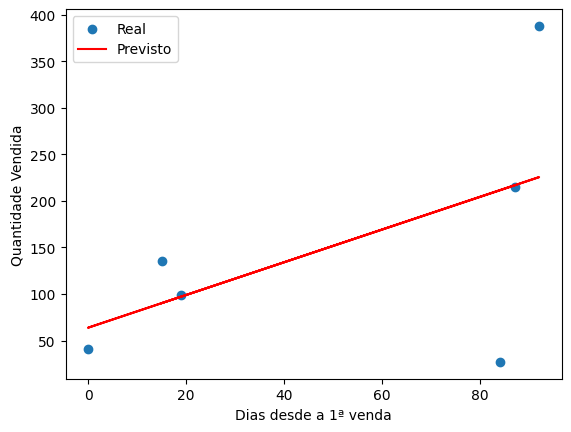

Previsão para 01/06/2023: 264


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dados exemplo: datas e quantidade vendida
data = {
    'DT_VENDA': ['2023-02-22', '2023-02-26', '2023-05-10', '2023-05-02', '2023-02-07', '2023-05-05'],
    'QTD_SAIDA': [135, 99, 388, 27, 41, 215]
}
df = pd.DataFrame(data)
df['DT_VENDA'] = pd.to_datetime(df['DT_VENDA'])

# Transformar data em número (dias desde a primeira data)
df['dias'] = (df['DT_VENDA'] - df['DT_VENDA'].min()).dt.days

# Separar features (X) e alvo (y)
X = df[['dias']]
y = df['QTD_SAIDA']

# Treinar modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Prever para os dados existentes
df['previsao'] = modelo.predict(X)

# Visualizar
plt.scatter(df['dias'], y, label='Real')
plt.plot(df['dias'], df['previsao'], color='red', label='Previsto')
plt.xlabel('Dias desde a 1ª venda')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.show()

# Fazer previsão para um dia futuro
dias_futuros = (pd.to_datetime('2023-06-01') - df['DT_VENDA'].min()).days
previsao_futuro = modelo.predict([[dias_futuros]])
print(f"Previsão para 01/06/2023: {previsao_futuro[0]:.0f}")
